# Visualizing Cramer's Rule

This Notebook will help you visualize Cramer's Rule using geometry.

Consider an invertible Matrix $A \in \mathrm{Mat}_{n \times n}(\mathbb{F})$ and a vector $b \in \mathbb{F}^n$. Let $A_i$ be the matrix given from $A$ by replacing the $i$<sup>th</sup> column of $A$ with $b$.

Cramer's rule says that the unique solution to the system of equations $A \vec{x} = \vec{b}$ is given by $x_i = \frac{\det(A_i)}{\det(A)}$.

Run the following code and read the explanation below it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import *
from sympy import Matrix

In [2]:
def get_solution(A , b):
    A_1, A_2 = A.copy(), A.copy()
    A_1[:,0] = b
    A_2[:,1] = b
    
    return Matrix([A_1.det() / A.det(), A_2.det() / A.det()])

<IPython.core.display.Javascript object>


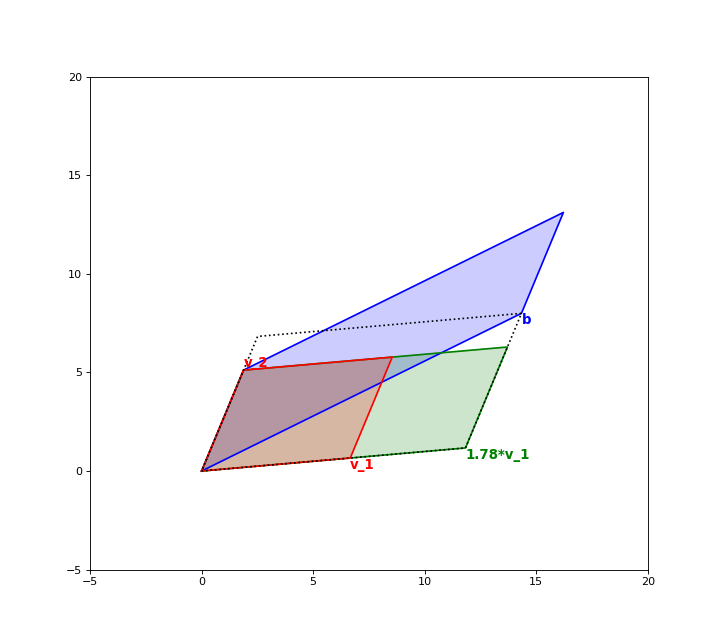

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.update(v_11=<ipywidgets.widgets.widget_float.FloatSlider object at 0x7ff7b443e210>, v_12=<ipywidgets.widgets.widget_float.FloatSlider object at 0x7ff7b433f1d0>, v_21=<ipywidgets.widgets.widget_float.FloatSlider object at 0x7ff7ac034e50>, v_22=<ipywidgets.widgets.widget_float.FloatSlider object at 0x7ff7abfc8990>, b_1=<ipywidgets.widgets.widget_float.FloatSlider object at 0x7ff7abfc9a50>, b_2=<ipywidgets.widgets.widget_float.FloatSlider object at 0x7ff7abfca550>, i=<ipywidgets.widgets.widget_int.IntSlider object at 0x7ff7ac040950>)>

In [7]:
%matplotlib notebook

# set up a plot
fig,ax = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)

# set initial parameters
scale_index = 0
origin = np.array([0,0])

def update(
    v_11 = FloatSlider(min=-4.00, max=15.00, step=0.01, value=4.0),
    v_12 = FloatSlider(min=-4.00, max=15.00, step=0.01, value=0.0),
    v_21 = FloatSlider(min=-4.00, max=15.00, step=0.01, value=2.0),
    v_22 = FloatSlider(min=-4.00, max=15.00, step=0.01, value=5.0),
    b_1 = FloatSlider(min=-4.00, max=15.00, step=0.01, value=10.0),
    b_2 = FloatSlider(min=-4.00, max=15.00, step=0.01, value=8.0),
    i = IntSlider(min=1, max=2, step=1, value=1)
):
    scale_index = i - 1
    A = Matrix([[v_11, v_21], [v_12, v_22]])
    b = Matrix([b_1, b_2])
    x = get_solution(A, b)
    
    scale = x[scale_index]

    v_1 = np.array(A[:,0].transpose())[0]
    v_2 = np.array(A[:,1].transpose())[0]

    v_1_scaled = scale * v_1 if scale_index == 0 else v_1
    v_2_scaled = v_2 if scale_index == 0 else scale * v_2

    b_arr = np.array(b.transpose())[0]

    parallelogram_small = np.array([
        origin,
        v_1,
        v_1 + v_2,
        v_2,
        origin
    ])

    parallelogram_scaled = np.array([
        origin,
        v_1_scaled,
        v_1_scaled + v_2_scaled,
        v_2_scaled,
        origin
    ])

    parallelogram_cramer = np.array([
        origin,
        b_arr if (scale_index == 0) else v_1,
        v_2 + b_arr if (scale_index == 0) else v_1 + b_arr,
        v_2 if (scale_index == 0) else b_arr,
        origin
    ])

    parallelogram_big = np.array([
        origin,
        x[0] * v_1,
        b_arr,
        x[1] * v_2,
        origin    
    ])

    # clear the axis
    
    ax.cla()
    ax.set_xlim(-5,20)
    ax.set_ylim(-5,20)
    
    # parallelogram with the scaled vector replaced by b
    cramer_edge = ax.plot(parallelogram_cramer[:, 0], parallelogram_cramer[:, 1], color='blue')
    cramer_fill = ax.fill(parallelogram_cramer[:, 0], parallelogram_cramer[:, 1], color='blue', alpha=0.2)

    # scaled parallelogram
    scaled_edge = ax.plot(parallelogram_scaled[:, 0], parallelogram_scaled[:, 1], color='green')
    scaled_fill = ax.fill(parallelogram_scaled[:, 0], parallelogram_scaled[:, 1], color='green', alpha=0.2)

    # small parallelogram
    small_edge = ax.plot(parallelogram_small[:, 0], parallelogram_small[:, 1], color='red')
    small_fill = ax.fill(parallelogram_small[:, 0], parallelogram_small[:, 1], color='red', alpha=0.2)

    # parallelogram with both axes scaled
    large_edge = ax.plot(parallelogram_big[:, 0], parallelogram_big[:, 1], linestyle="dotted", color='black')


    # vector names
    ax.text(b[0], b[1], 'b', color='blue', fontsize=12, weight='bold', va='top')

    ax.text(v_1[0], v_1[1], 'v_1', color='red', fontsize=12, weight='bold', va='top')
    ax.text(v_2[0], v_2[1], 'v_2', color='red', fontsize=12, weight='bold', va='bottom')

    if(scale_index == 0):
        ax.text(v_1_scaled[0], v_1_scaled[1], f'{x[0]:.2f}*v_1', color='green', fontsize=12, weight='bold', va='top')
    else:
        ax.text(v_2_scaled[0], v_2_scaled[1], f'{x[1]:.2f}*v_2', color='green', fontsize=12, weight='bold', va='bottom')
    
    # update canvas
    fig.canvas.draw_idle()

interact(update)

In the above diagram, there are three parallelograms with a vertex on the origin:

1. The red parallelogram has the columns of A, which we call $v_1$ and $v_2$, edges.
2. The green parallelogram has the edges $x_1 v_1$ and $v_2$ if $i = 1$, or $v_1$ and $x_2 v_2$ if $i = 2$.
3. The blue matrix has the columns of the matrix A_i as edges.

Cramer's rules in 2D can be seen from the fact that the green and blue matrices have the same area, though this geometric property scales to higher dimensions.

The area of the green matrix, if $i = 1$, is
$$\det(A_1) = \det\begin{pmatrix}\vert & \vert \\ x_1 v_1 & v_2 \\ \vert & \vert\end{pmatrix} = x_1 \det\begin{pmatrix}\vert & \vert \\ v_1 & v_2 \\ \vert & \vert\end{pmatrix} = x_1 \det(A)$$
from which we get
$$x_1 = \frac{\det(A_i)}{\det(A)}$$
by dividing by $\det(A)$, which is non-zero as $A$ is invertible.

Similarly, when $i=2$ we get that
$$x_2 = \frac{\det(A_2)}{\det(A)} \text{.}$$